In [ ]:
import pandas as pd
import numpy as np
import tensorflow as tf
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

# Load the dataset (assuming it's in a CSV file)
data = pd.read_csv('/content/CAR DETAILS FROM CAR DEKHO.csv')

# Data Cleaning
# Drop rows with missing values in any of the selected columns
columns_toclean = ['name', 'year', 'selling_price', 'km_driven', 'fuel', 'seller_type', 'transmission']
data_cleaned = data.dropna(subset=columns_to_clean)

# Convert 'year' and 'km_driven' to numeric data types (assuming they are stored as strings)
data_cleaned['year'] = data_cleaned['year'].astype(int)
# Assuming 'km_driven' is already in numeric format
data_cleaned['km_driven'] = data_cleaned['km_driven'].astype(int)

# Encode categorical variables
data_cleaned = pd.get_dummies(data_cleaned, columns=['fuel', 'seller_type', 'transmission'])

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(data_cleaned[['year', 'km_driven',
                                                                'fuel_CNG', 'fuel_Diesel', 'fuel_Petrol',
                                                                'seller_type_Dealer', 'seller_type_Individual', 'seller_type_Trustmark Dealer',
                                                                'transmission_Automatic', 'transmission_Manual']],
                                                    data_cleaned['selling_price'], test_size=0.25)

# Feature Scaling
scaler = StandardScaler()
X_train[['year', 'km_driven']] = scaler.fit_transform(X_train[['year', 'km_driven']])
X_test[['year', 'km_driven']] = scaler.transform(X_test[['year', 'km_driven']])

# Define the neural network architecture
model = tf.keras.models.Sequential([
  tf.keras.layers.Dense(128, activation='relu', input_shape=(X_train.shape[1],)),
  tf.keras.layers.Dense(64, activation='relu'),
  tf.keras.layers.Dense(1)
])

# Compile the neural network model
model.compile(optimizer='adam', loss='mse')

# Train the neural network model
model.fit(X_train, y_train, epochs=100)

# Evaluate the trained neural network model on the testing set
loss = model.evaluate(X_test, y_test)
print('Mean Squared Error (MSE):', loss)

# Predict the selling price of a car
# Scale the 'year' and 'km_driven' features for the car_features input
car_features = [2018, 10000, 0, 1, 0, 1, 0, 0, 1, 0]  # Example for a car with features
# Predict the selling price of a car using the scaled features
# Predict the selling price of a car using the scaled features
scaled_car_features = np.array(car_features).reshape(1, -1)  # Reshape to match the input shape of the model
predicted_selling_price = model.predict(scaled_car_features)

# Print the predicted selling price
print('Predicted selling price:', predicted_selling_price[0][0])



Epoch 1/100
102/102 [==============================] - 1s 2ms/step - loss: 574117773312.0000
Epoch 2/100
102/102 [==============================] - 0s 2ms/step - loss: 573698932736.0000
Epoch 3/100
102/102 [==============================] - 0s 2ms/step - loss: 571842297856.0000
Epoch 4/100
102/102 [==============================] - 0s 2ms/step - loss: 567428120576.0000
Epoch 5/100
102/102 [==============================] - 0s 2ms/step - loss: 559502393344.0000
Epoch 6/100
102/102 [==============================] - 0s 2ms/step - loss: 547355754496.0000
Epoch 7/100
102/102 [==============================] - 0s 2ms/step - loss: 530839764992.0000
Epoch 8/100
102/102 [==============================] - 0s 2ms/step - loss: 509981065216.0000
Epoch 9/100
102/102 [==============================] - 0s 2ms/step - loss: 485254561792.0000
Epoch 10/100
102/102 [==============================] - 0s 2ms/step - loss: 457716334592.0000
Epoch 11/100
102/102 [==============================] - 0s 2ms/step -

34/34 [==============================] - 0s 5ms/step


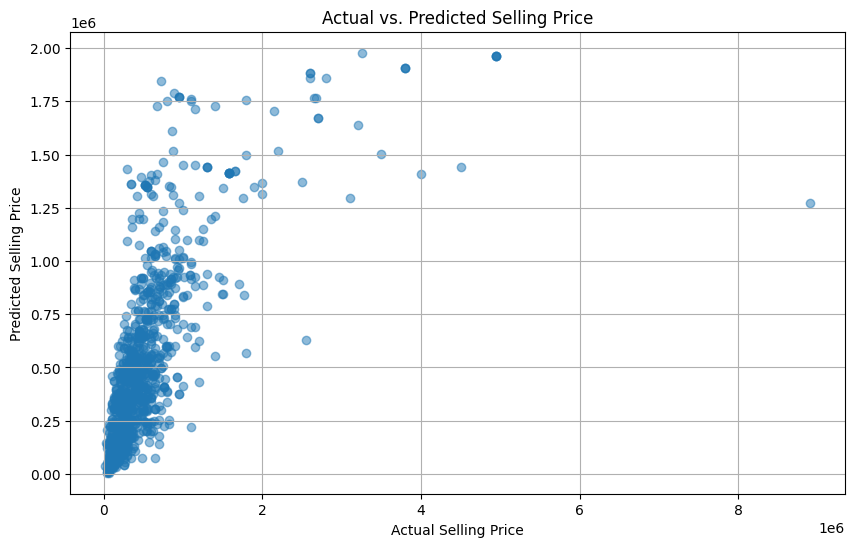

In [ ]:
import matplotlib.pyplot as plt

# Predict the selling prices for the test set
y_pred = model.predict(X_test)

# Plotting
plt.figure(figsize=(10, 6))
plt.scatter(y_test, y_pred, alpha=0.5)
plt.xlabel('Actual Selling Price')
plt.ylabel('Predicted Selling Price')
plt.title('Actual vs. Predicted Selling Price')
plt.grid(True)
plt.show()
